In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Documents\\TLCN\\part-00000-623d3baf-c179-401c-ab3f-0f9570ca4949-c000.csv")

In [3]:
df['type'].value_counts()

Hike    132
Ride    127
Swim    125
Walk    113
Run     106
Name: type, dtype: int64

In [4]:
df.head()

,run_id,student_id,name,gender,org_name,org_name_child,year_study,average_speed,max_speed,average_heartrate,...,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count,timestamp,partition_date,partition_hour
0,41.0,20116315,Phan Ngoc Han,Nu,Cong nghe hoa hoc va thuc pham,Ki thuat hoa,Nam 4,8.918,8.340,9.531,...,7983,168,8.1,804.3,Walk,11/16/2023 16:41,15,2023-11-16T16:41:58.403+07:00,11/16/2023,16
1,42.0,20124363,Le Kim Long,Nam,Kinh te,Logistics va quan ly chuoi cung ung,Nam 4,5.549,5.600,10.760,...,7092,4445,59.9,1280.7,Ride,11/16/2023 16:42,2,2023-11-16T16:42:00.404+07:00,11/16/2023,16
2,43.0,21116315,Nguyen Le Huynh,Nam,Cong nghe hoa hoc va thuc pham,Ki thuat hoa,Nam 3,6.527,7.497,1.982,...,1263,3023,151.8,363.1,Run,11/16/2023 16:42,10,2023-11-16T16:42:02.406+07:00,11/16/2023,16
3,44.0,19142069,Phan Chu Lan,Nu,Dien dien tu,Dien tu,Nam 3,3.336,1.168,7.239,...,3944,2880,45.2,580.6,Run,11/16/2023 16:42,9,2023-11-16T16:42:04.409+07:00,11/16/2023,16
4,45.0,19131159,Le Kieu Yen,Nu,Ngoai ngu,Ngon ngu anh,Nam 3,8.800,10.513,NaN,...,4915,1800,70.9,1156.0,Swim,11/16/2023 16:42,3,2023-11-16T16:42:06.411+07:00,11/16/2023,16


In [5]:
df = df[df['type'].isin(['Run','Ride'])]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 1 to 598
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   run_id                231 non-null    float64
 1   student_id            233 non-null    int64  
 2   name                  233 non-null    object 
 3   gender                233 non-null    object 
 4   org_name              233 non-null    object 
 5   org_name_child        233 non-null    object 
 6   year_study            233 non-null    object 
 7   average_speed         233 non-null    float64
 8   max_speed             233 non-null    float64
 9   average_heartrate     120 non-null    float64
 10  max_heartrate         121 non-null    float64
 11  distance              233 non-null    float64
 12  elapsed_time          233 non-null    object 
 13  moving_time           233 non-null    object 
 14  total_elevation_gain  233 non-null    float64
 15  elev_high             2

In [8]:
df['elev_high'] = df['elev_high'].fillna(value=0)

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1 to 592
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   run_id                117 non-null    float64
 1   student_id            117 non-null    int64  
 2   name                  117 non-null    object 
 3   gender                117 non-null    object 
 4   org_name              117 non-null    object 
 5   org_name_child        117 non-null    object 
 6   year_study            117 non-null    object 
 7   average_speed         117 non-null    float64
 8   max_speed             117 non-null    float64
 9   average_heartrate     117 non-null    float64
 10  max_heartrate         117 non-null    float64
 11  distance              117 non-null    float64
 12  elapsed_time          117 non-null    object 
 13  moving_time           117 non-null    object 
 14  total_elevation_gain  117 non-null    float64
 15  elev_high             1

In [11]:
df['distance'] = df['distance']/1000
df['distance'] = df['distance'].round(2)

df['average_speed'] = 1/(df['average_speed']/100*6)
df['average_speed'] = df['average_speed'].round(2)

df['max_speed'] = 1/(df['max_speed']/100*6)
df['max_speed'] = df['max_speed'].round(2)

In [12]:
df['elapsed_time'].str.len().value_counts()

4    101
3     16
Name: elapsed_time, dtype: int64

In [13]:
df[df['elapsed_time'].str.len() == 14]

,run_id,student_id,name,gender,org_name,org_name_child,year_study,average_speed,max_speed,average_heartrate,...,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count,timestamp,partition_date,partition_hour


In [14]:
def to_minutes(str):
    return sum(i*j for i, j in zip(map(float, str.split(':')), [60, 1, 1/60]))

df['time_min_elapsed'] = df['elapsed_time'].apply(to_minutes)
df['time_min_moving'] = df['moving_time'].apply(to_minutes)

df['time_min_elapsed'] = df['time_min_elapsed'].round(2)
df['time_min_moving'] = df['time_min_moving'].round(2)

In [15]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'])

In [16]:
df

,run_id,student_id,name,gender,org_name,org_name_child,year_study,average_speed,max_speed,average_heartrate,...,total_elevation_gain,elev_high,type,start_date_local,kudos_count,timestamp,partition_date,partition_hour,time_min_elapsed,time_min_moving
1,42.0,20124363,Le Kim Long,Nam,Kinh te,Logistics va quan ly chuoi cung ung,Nam 4,3.00,2.98,10.760,...,59.9,1280.7,Ride,2023-11-16 16:42:00,2,2023-11-16T16:42:00.404+07:00,11/16/2023,16,425520.0,266700.0
2,43.0,21116315,Nguyen Le Huynh,Nam,Cong nghe hoa hoc va thuc pham,Ki thuat hoa,Nam 3,2.55,2.22,1.982,...,151.8,363.1,Run,2023-11-16 16:42:00,10,2023-11-16T16:42:02.406+07:00,11/16/2023,16,75780.0,181380.0
3,44.0,19142069,Phan Chu Lan,Nu,Dien dien tu,Dien tu,Nam 3,5.00,14.27,7.239,...,45.2,580.6,Run,2023-11-16 16:42:00,9,2023-11-16T16:42:04.409+07:00,11/16/2023,16,236640.0,172800.0
13,54.0,19110299,Le Quoc Nam,Nam,Cong nghe thong tin,Cong nghe thong tin,Nam 3,1.90,3.01,10.331,...,226.0,122.3,Ride,2023-11-16 16:42:00,17,2023-11-16T16:42:24.431+07:00,11/16/2023,16,30960.0,51540.0
21,62.0,21116315,Nguyen Le Huynh,Nam,Cong nghe hoa hoc va thuc pham,Ki thuat hoa,Nam 3,2.51,2.45,9.338,...,470.2,1004.4,Ride,2023-11-16 16:42:00,19,2023-11-16T16:42:40.448+07:00,11/16/2023,16,265980.0,70620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,3.0,22146121,Dang Tuan Duan,Nam,Dao tao quoc te,Kinh doanh quoc te,Nam 2,5.87,15.14,9.692,...,146.9,66.8,Run,2023-11-29 10:38:00,2,2023-11-29T10:38:05.872+07:00,11/29/2023,10,227940.0,166080.0
580,9.0,20124364,Le Kim Nhung,Nu,Kinh te,Logistics va quan ly chuoi cung ung,Nam 4,1.55,3.52,4.008,...,682.1,1319.7,Run,2023-11-21 20:29:00,6,2023-11-21T20:29:44.766+07:00,11/21/2023,20,39060.0,346800.0
582,2.0,19116315,Le Thi Thuy Duyen,Nu,Cong nghe hoa hoc va thuc pham,Ki thuat hoa,Nam 3,1.87,2.28,1.745,...,676.5,171.1,Ride,2023-11-21 20:23:00,18,2023-11-21T20:23:24.321+07:00,11/21/2023,20,199440.0,284400.0
583,3.0,19124360,Le Kim Hung,Nu,Kinh te,Thuong mai dien tu,Nam 3,1.81,1.82,7.805,...,108.6,789.3,Ride,2023-11-21 20:23:00,5,2023-11-21T20:23:26.324+07:00,11/21/2023,20,236760.0,55020.0


In [17]:
df.groupby('type')['distance'].nlargest(3)

type     
Ride  13     16.46
      334    13.69
      137    10.61
Run   339    16.19
      114    15.41
      2      14.89
Name: distance, dtype: float64

In [18]:
df.groupby('type')['time_min_elapsed'].nlargest(3)

type     
Ride  340    461400.0
      110    460920.0
      240    457020.0
Run   512    478800.0
      551    465660.0
      291    457560.0
Name: time_min_elapsed, dtype: float64

In [22]:
df.loc[1,:]

run_id                                                 42.0
student_id                                         20124363
name                                            Le Kim Long
gender                                                  Nam
org_name                                            Kinh te
org_name_child          Logistics va quan ly chuoi cung ung
year_study                                            Nam 4
average_speed                                           3.0
max_speed                                              2.98
average_heartrate                                     10.76
max_heartrate                                         7.259
distance                                               6.65
elapsed_time                                           7092
moving_time                                            4445
total_elevation_gain                                   59.9
elev_high                                            1280.7
type                                    

In [23]:
data = df[df['type'] == 'Run']

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4080\3784617568.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_elevation_gain']);


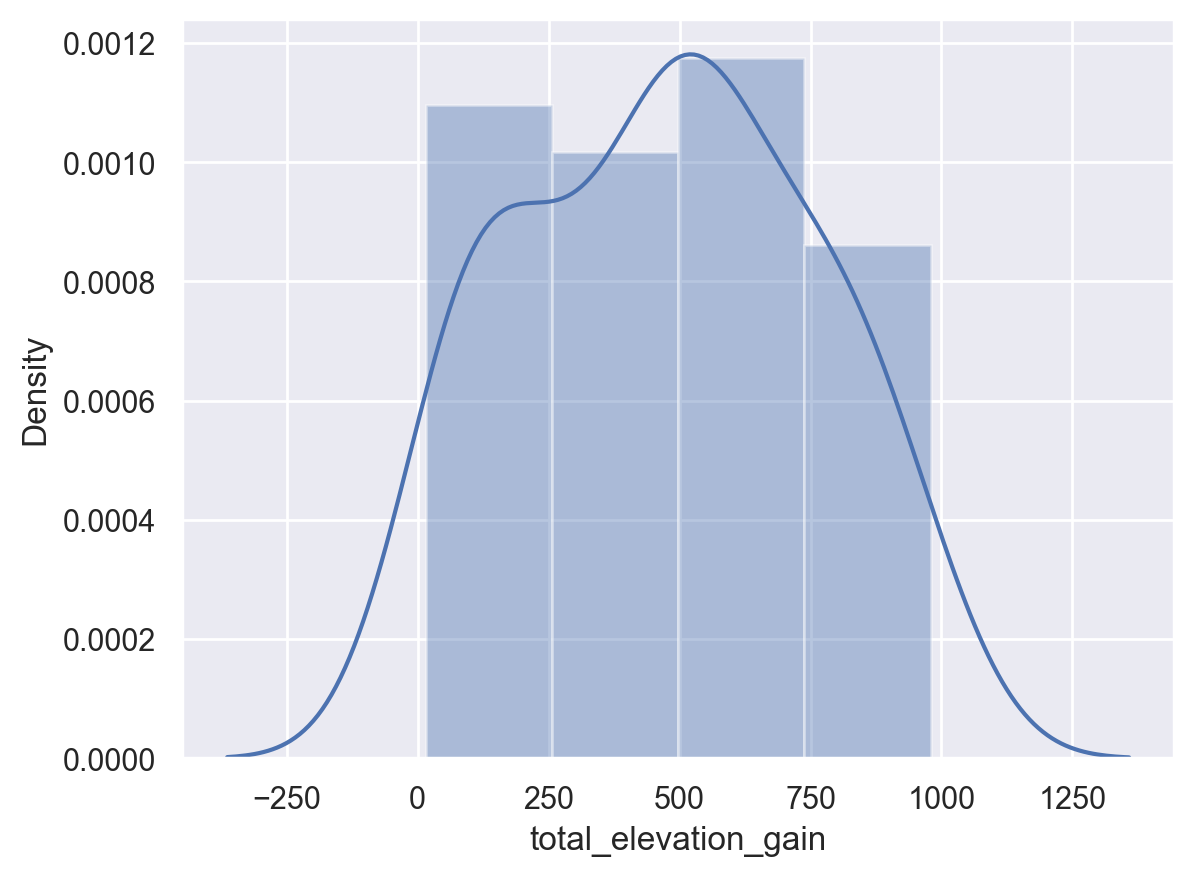

In [25]:
%config InlineBackend.figure_format = 'retina'
sns.distplot(data['total_elevation_gain']);

In [26]:
import numpy as np

In [27]:
data.apply(np.max)

run_id                                           100.0
student_id                                    23146119
name                                    Tran Minh Dung
gender                                              Nu
org_name                                      Xay dung
org_name_child          Xay dung cong trinh giao thong
year_study                                       Nam 4
average_speed                                    15.19
max_speed                                        15.14
average_heartrate                               10.962
max_heartrate                                   10.851
distance                                         16.19
elapsed_time                                       986
moving_time                                        985
total_elevation_gain                             979.4
elev_high                                       1319.7
type                                               Run
start_date_local                   2023-11-29 10:41:00
kudos_coun

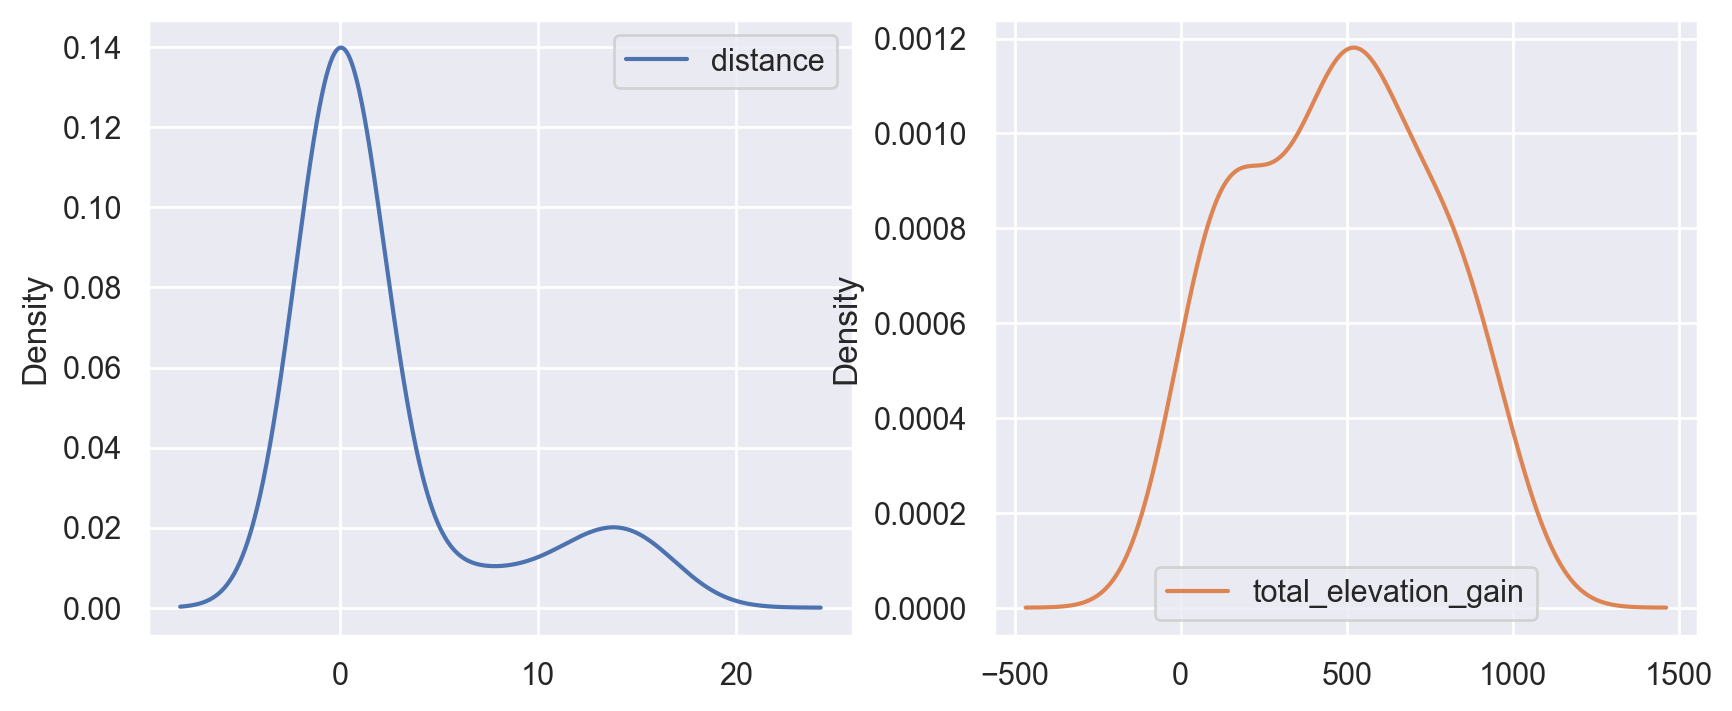

In [28]:
features = ['distance', 'total_elevation_gain']
data[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

In [29]:
data = data.drop(['elapsed_time', 'moving_time','type','kudos_count'], axis=1)

In [30]:
data.set_index('start_date_local', inplace=True)
data.head()

,run_id,student_id,name,gender,org_name,org_name_child,year_study,average_speed,max_speed,average_heartrate,max_heartrate,distance,total_elevation_gain,elev_high,timestamp,partition_date,partition_hour,time_min_elapsed,time_min_moving
start_date_local,,,,,,,,,,,,,,,,,,,
2023-11-16 16:42:00,43.0,21116315,Nguyen Le Huynh,Nam,Cong nghe hoa hoc va thuc pham,Ki thuat hoa,Nam 3,2.55,2.22,1.982,4.737,14.89,151.8,363.1,2023-11-16T16:42:02.406+07:00,11/16/2023,16,75780.0,181380.0
2023-11-16 16:42:00,44.0,19142069,Phan Chu Lan,Nu,Dien dien tu,Dien tu,Nam 3,5.00,14.27,7.239,6.934,14.20,45.2,580.6,2023-11-16T16:42:04.409+07:00,11/16/2023,16,236640.0,172800.0
2023-11-16 16:42:00,69.0,19131158,Le Lan Trinh,Nu,Ngoai ngu,Ngon ngu anh,Nam 3,3.45,2.96,10.296,3.762,7.68,15.1,728.0,2023-11-16T16:42:54.463+07:00,11/16/2023,16,166800.0,285420.0
2023-11-16 16:43:00,80.0,21156073,Tran Minh Dung,Nu,In va truyen thong,In,Nam 3,3.87,1.64,6.990,3.417,4.05,749.9,1168.9,2023-11-16T16:43:16.485+07:00,11/16/2023,16,418020.0,24120.0
2023-11-21 21:29:00,17.0,22146119,Huynh Nguyen Tuan Kiet,Nam,Dao tao quoc te,Kinh doanh quoc te,Nam 2,2.07,3.72,3.605,2.792,0.00,417.3,1166.0,2023-11-21T21:29:19.954+07:00,11/21/2023,21,57540.0,95820.0


In [31]:
data.index

DatetimeIndex(['2023-11-16 16:42:00', '2023-11-16 16:42:00',
               '2023-11-16 16:42:00', '2023-11-16 16:43:00',
               '2023-11-21 21:29:00', '2023-11-21 21:29:00',
               '2023-11-21 21:29:00', '2023-11-21 21:29:00',
               '2023-11-16 15:45:00', '2023-11-21 21:30:00',
               '2023-11-16 16:41:00', '2023-11-16 16:41:00',
               '2023-11-16 16:41:00', '2023-11-16 16:43:00',
               '2023-11-16 16:43:00', '2023-11-29 10:39:00',
               '2023-11-21 21:30:00', '2023-11-29 10:40:00',
               '2023-11-29 10:35:00', '2023-11-29 10:35:00',
               '2023-11-29 10:40:00', '2023-11-29 10:40:00',
               '2023-11-21 20:24:00', '2023-11-21 20:24:00',
               '2023-11-21 20:35:00', '2023-11-19 21:04:00',
               '2023-11-16 15:45:00', '2023-11-16 15:45:00',
               '2023-11-29 10:36:00', '2023-11-29 10:36:00',
               '2023-11-29 10:33:00', '2023-11-21 20:35:00',
               '2023-11-

In [32]:
data.isnull().sum()

run_id                  0
student_id              0
name                    0
gender                  0
org_name                0
org_name_child          0
year_study              0
average_speed           0
max_speed               0
average_heartrate       0
max_heartrate           0
distance                0
total_elevation_gain    0
elev_high               0
timestamp               0
partition_date          0
partition_hour          0
time_min_elapsed        0
time_min_moving         0
dtype: int64

In [33]:
data[data['max_speed'] == data['max_speed'].max()]

,run_id,student_id,name,gender,org_name,org_name_child,year_study,average_speed,max_speed,average_heartrate,max_heartrate,distance,total_elevation_gain,elev_high,timestamp,partition_date,partition_hour,time_min_elapsed,time_min_moving
start_date_local,,,,,,,,,,,,,,,,,,,
2023-11-29 10:38:00,3.0,22146121,Dang Tuan Duan,Nam,Dao tao quoc te,Kinh doanh quoc te,Nam 2,5.87,15.14,9.692,8.254,0.01,146.9,66.8,2023-11-29T10:38:05.872+07:00,11/29/2023,10,227940.0,166080.0


In [34]:
data = data.drop(['max_speed'], axis=1)

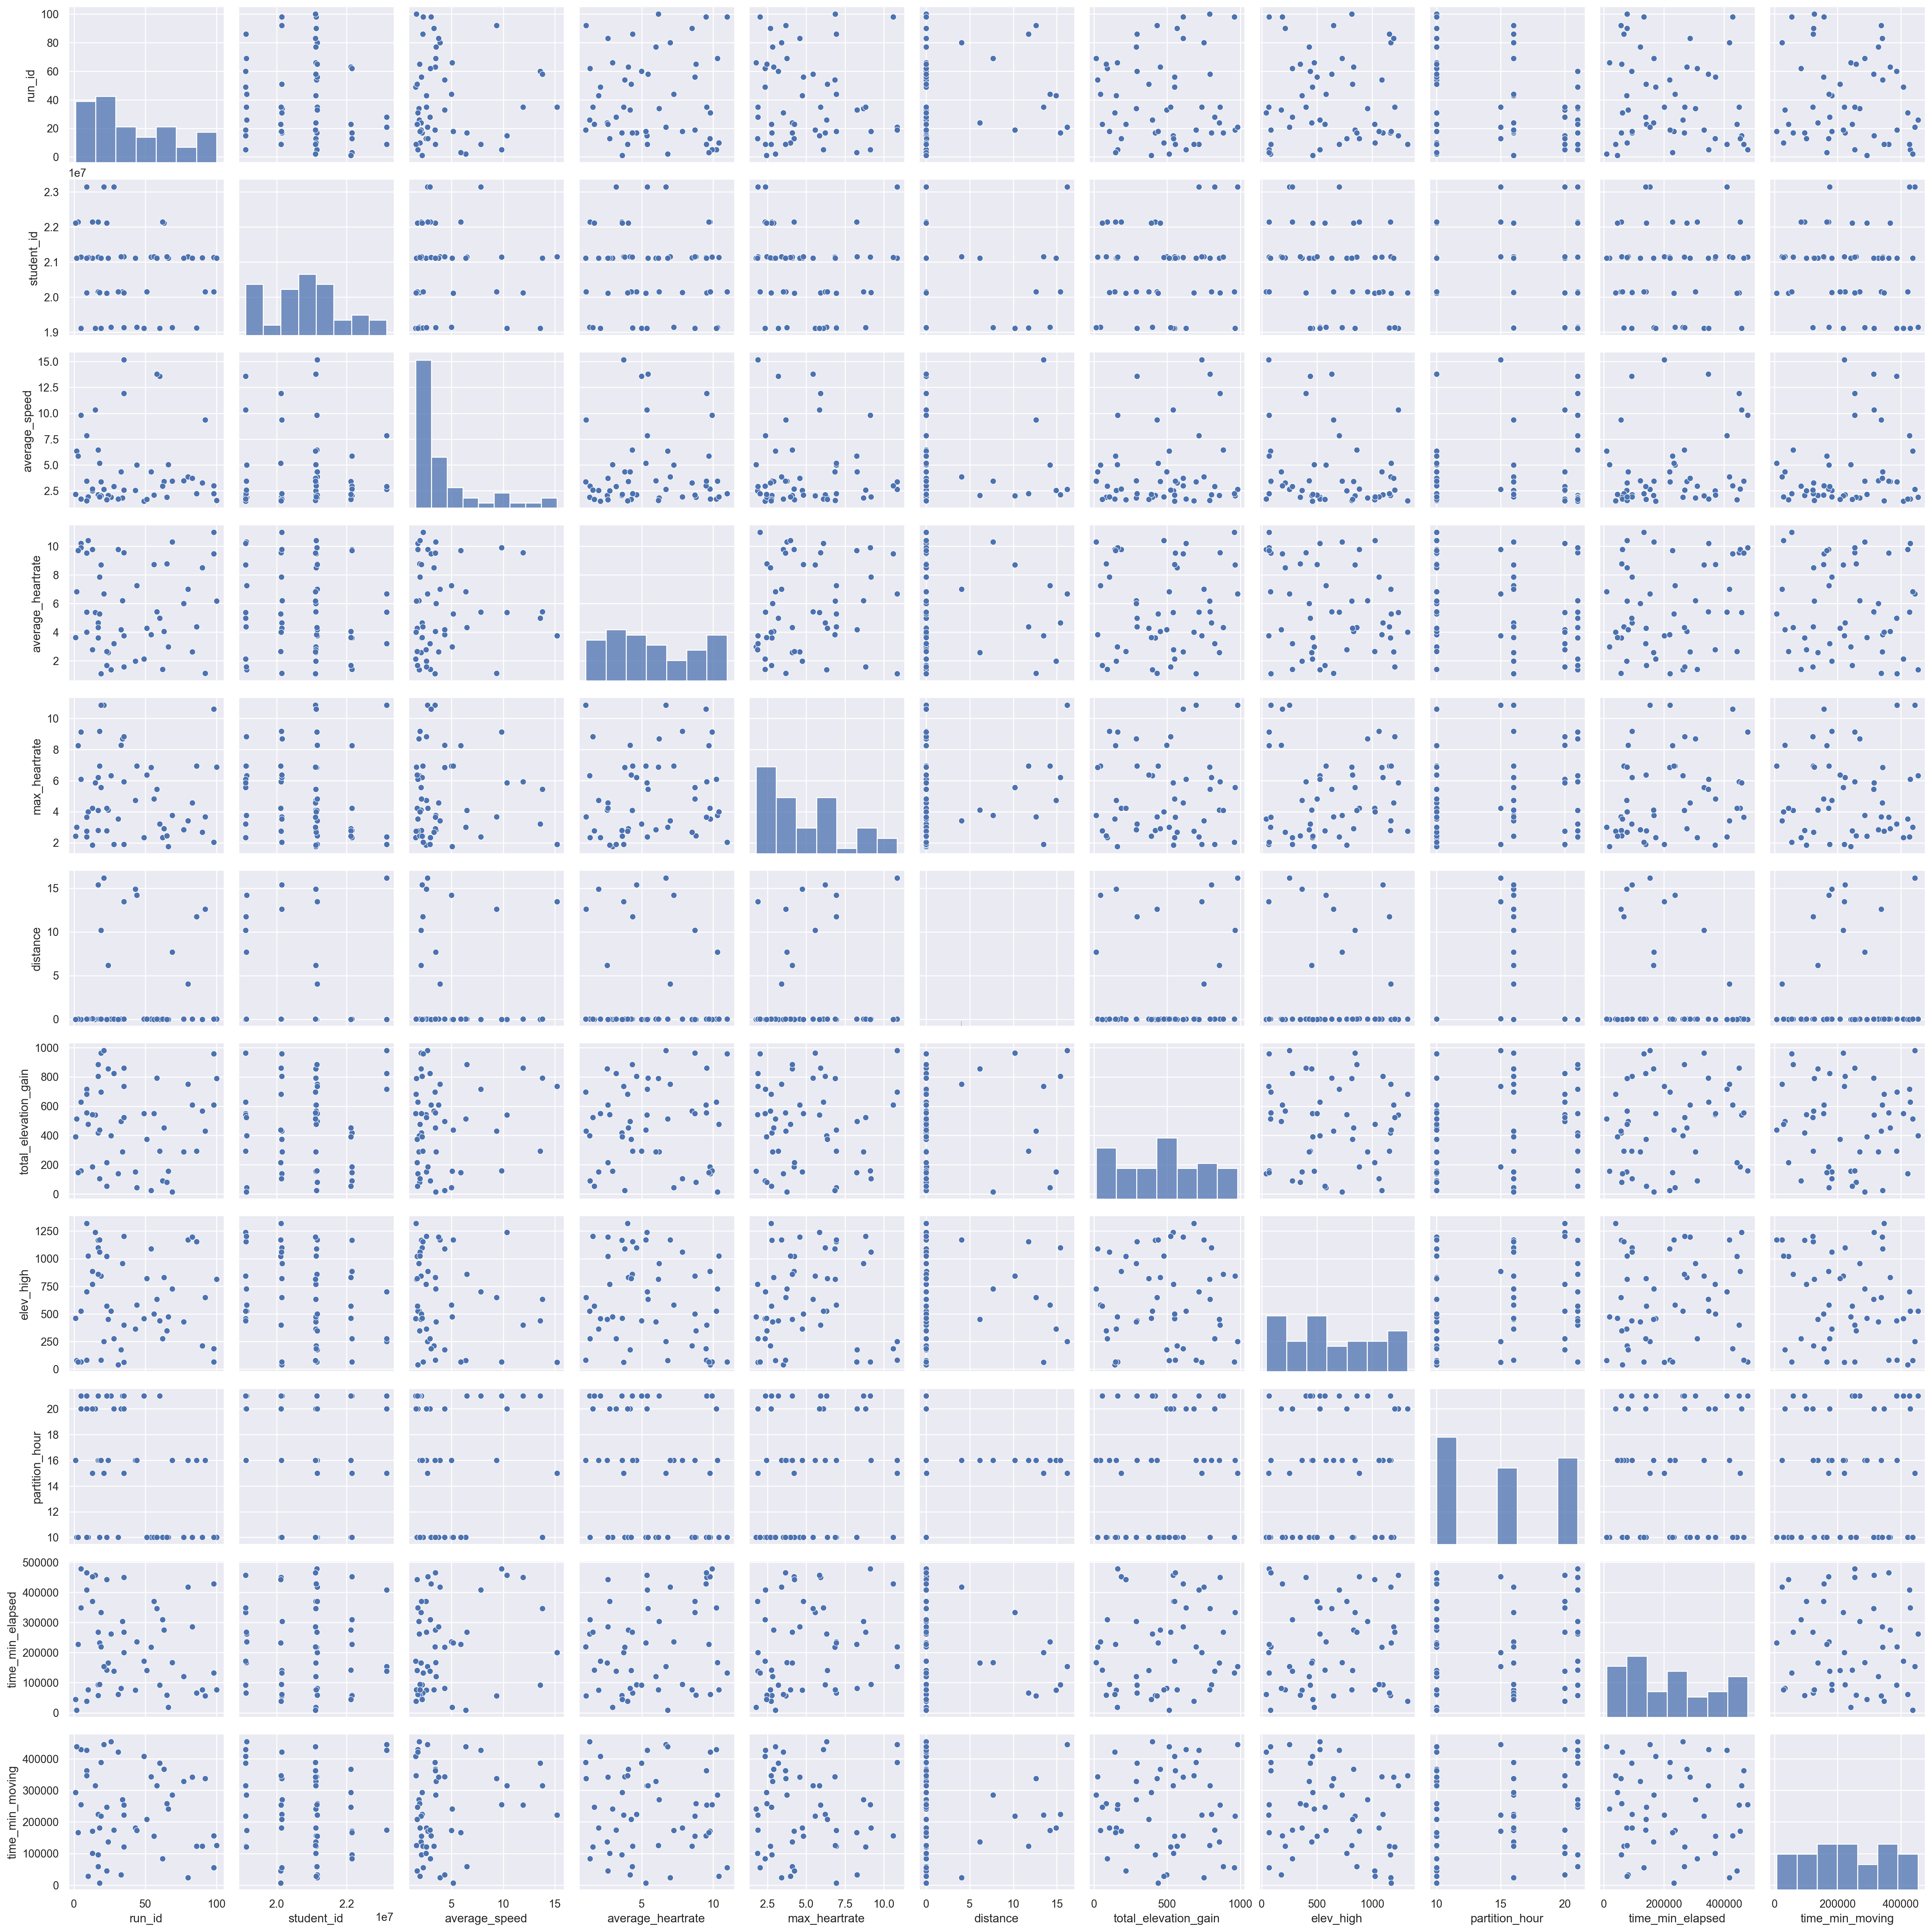

In [35]:
sns.pairplot(data)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4080\1686725216.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


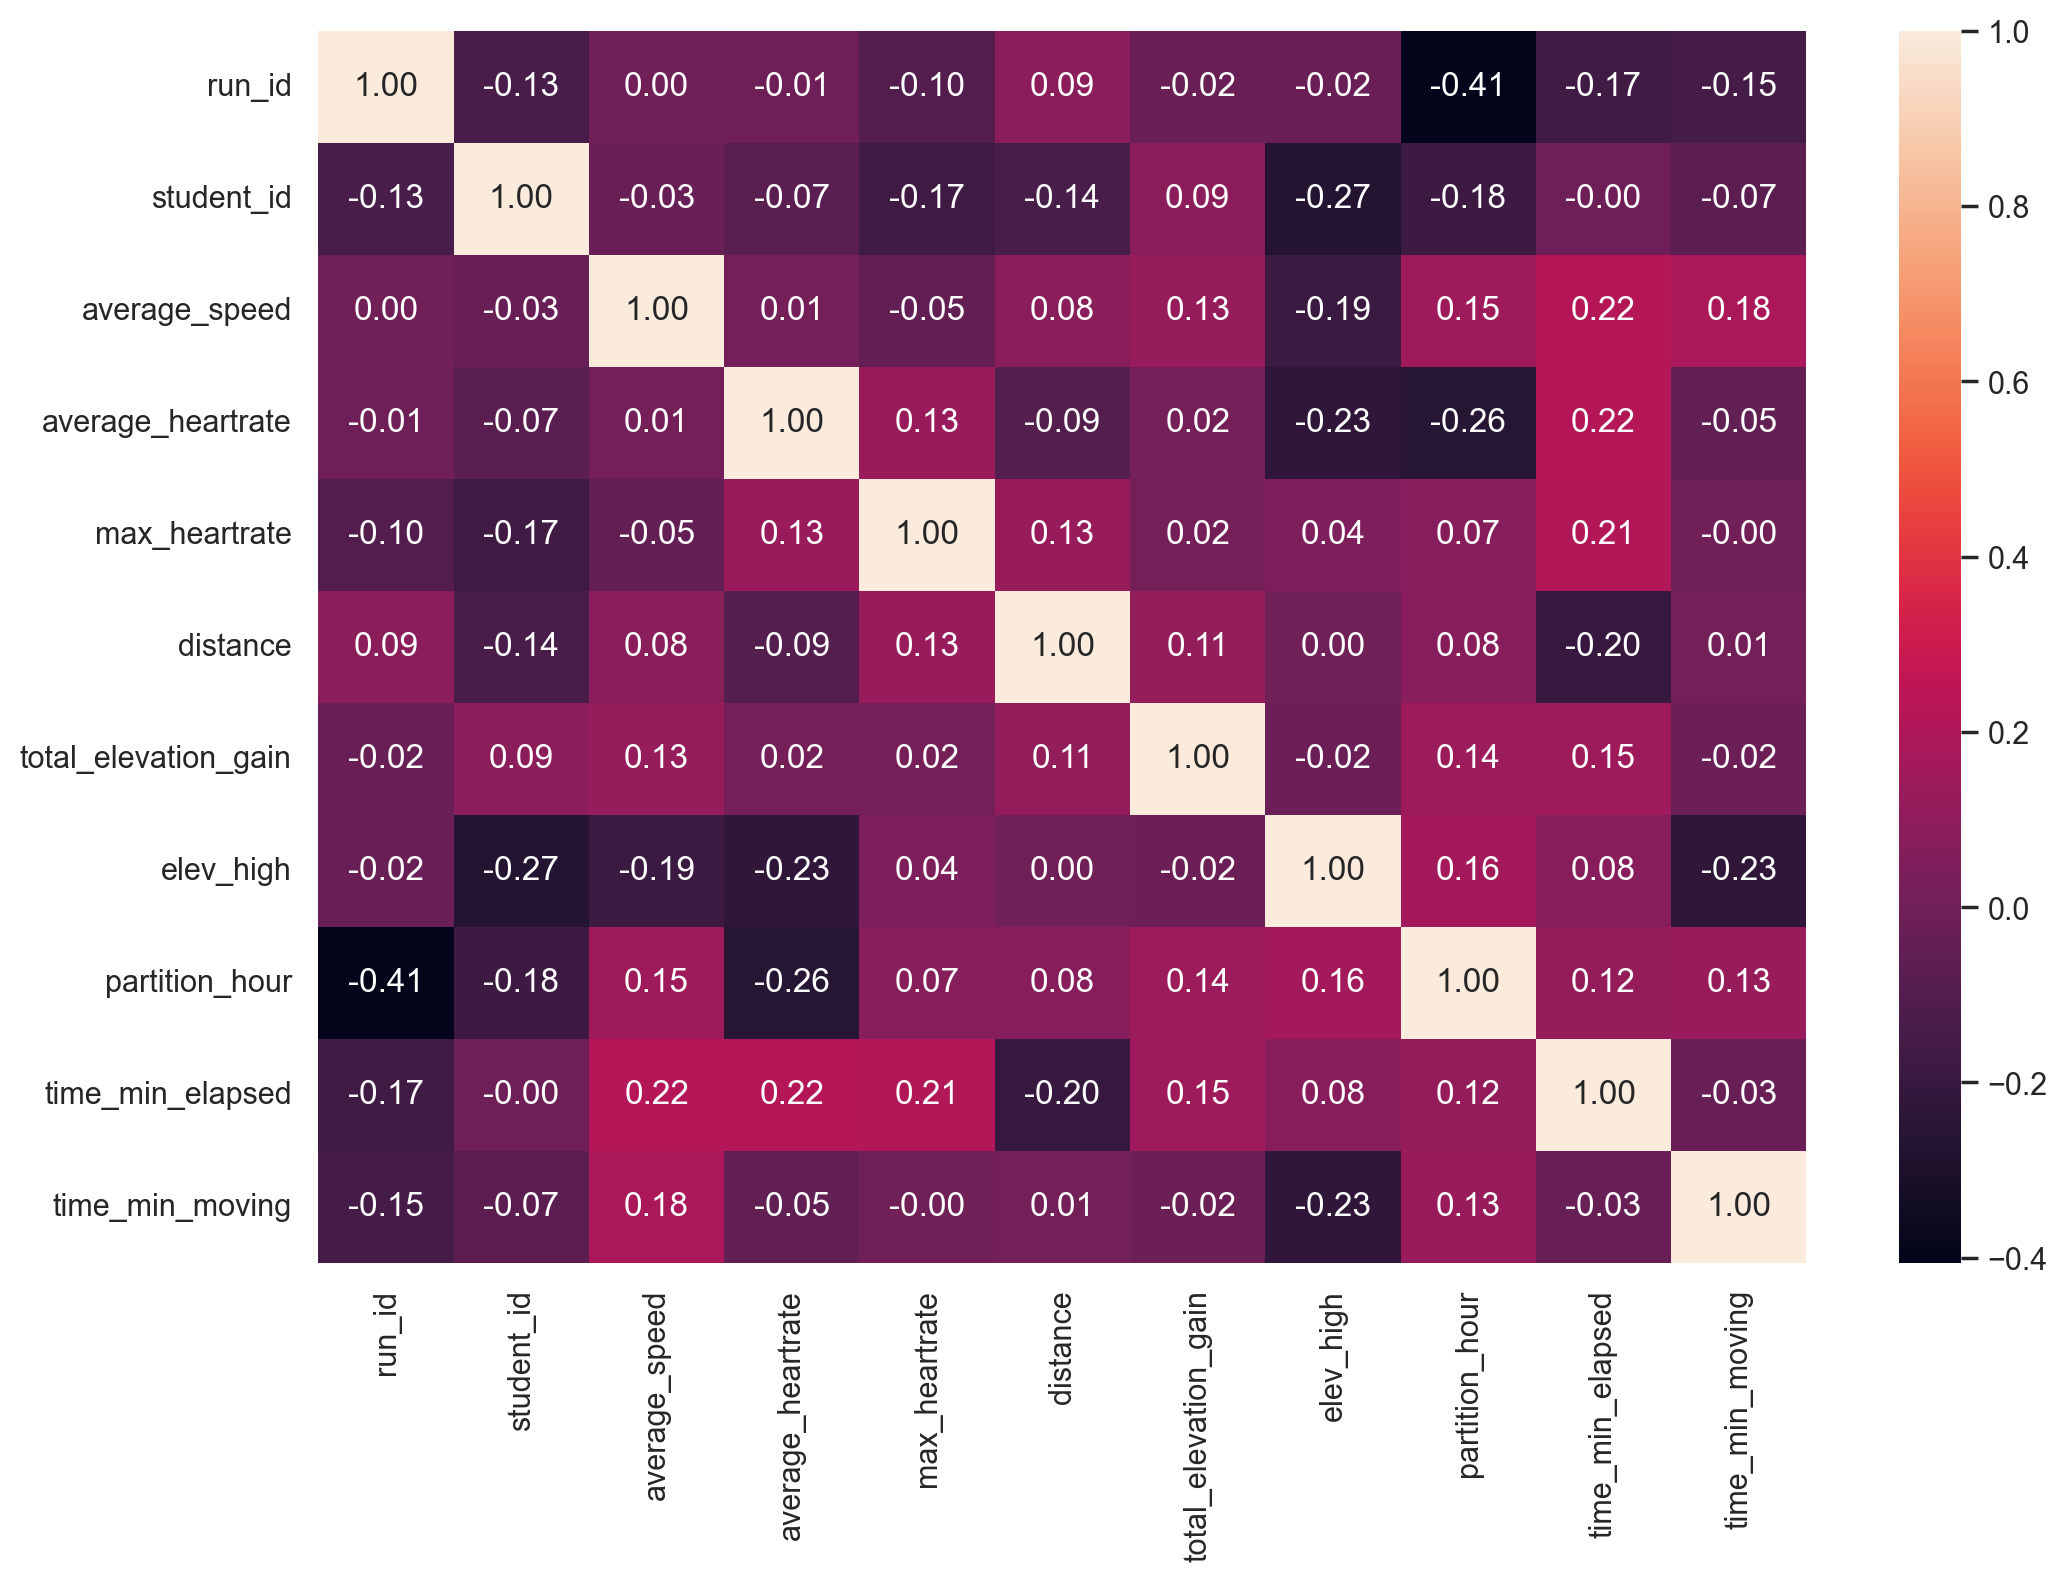

In [36]:
corr = data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [37]:
trends = data.copy()

In [38]:
trends.set_index(pd.to_datetime(trends.index), drop=True, inplace=True)

In [39]:
trends['weekday'] = trends.index.map(lambda x: x.weekday)

In [40]:
trends

,run_id,student_id,name,gender,org_name,org_name_child,year_study,average_speed,average_heartrate,max_heartrate,distance,total_elevation_gain,elev_high,timestamp,partition_date,partition_hour,time_min_elapsed,time_min_moving,weekday
start_date_local,,,,,,,,,,,,,,,,,,,
2023-11-16 16:42:00,43.0,21116315,Nguyen Le Huynh,Nam,Cong nghe hoa hoc va thuc pham,Ki thuat hoa,Nam 3,2.55,1.982,4.737,14.89,151.8,363.1,2023-11-16T16:42:02.406+07:00,11/16/2023,16,75780.0,181380.0,3
2023-11-16 16:42:00,44.0,19142069,Phan Chu Lan,Nu,Dien dien tu,Dien tu,Nam 3,5.00,7.239,6.934,14.20,45.2,580.6,2023-11-16T16:42:04.409+07:00,11/16/2023,16,236640.0,172800.0,3
2023-11-16 16:42:00,69.0,19131158,Le Lan Trinh,Nu,Ngoai ngu,Ngon ngu anh,Nam 3,3.45,10.296,3.762,7.68,15.1,728.0,2023-11-16T16:42:54.463+07:00,11/16/2023,16,166800.0,285420.0,3
2023-11-16 16:43:00,80.0,21156073,Tran Minh Dung,Nu,In va truyen thong,In,Nam 3,3.87,6.990,3.417,4.05,749.9,1168.9,2023-11-16T16:43:16.485+07:00,11/16/2023,16,418020.0,24120.0,3
2023-11-21 21:29:00,17.0,22146119,Huynh Nguyen Tuan Kiet,Nam,Dao tao quoc te,Kinh doanh quoc te,Nam 2,2.07,3.605,2.792,0.00,417.3,1166.0,2023-11-21T21:29:19.954+07:00,11/21/2023,21,57540.0,95820.0,1
2023-11-21 21:29:00,26.0,19146119,Dao Tan Kiet,Nam,Dao tao quoc te,Kinh doanh quoc te,Nam 3,1.88,1.371,6.318,0.01,398.4,525.8,2023-11-21T21:29:37.981+07:00,11/21/2023,21,262740.0,454560.0,1
2023-11-21 21:29:00,34.0,20156073,Dang Tuan Duan,Nam,In va truyen thong,In,Nam 4,1.83,6.207,8.691,0.01,289.7,957.8,2023-11-21T21:29:54.000+07:00,11/21/2023,21,304500.0,270540.0,1
2023-11-21 21:29:00,35.0,20124363,Le Kim Long,Nam,Kinh te,Logistics va quan ly chuoi cung ung,Nam 4,11.91,9.552,5.923,0.01,861.1,400.4,2023-11-21T21:29:56.002+07:00,11/21/2023,21,449760.0,254040.0,1
2023-11-16 15:45:00,35.0,21156073,Nguyen Thi Phuong Anh,Nu,In va truyen thong,Truyen thong,Nam 3,15.19,3.739,1.890,13.45,735.1,63.8,2023-11-16T15:45:58.621+07:00,11/16/2023,15,200760.0,221400.0,3


In [41]:
trends.groupby('weekday').mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4080\364558875.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends.groupby('weekday').mean()


,run_id,student_id,average_speed,average_heartrate,max_heartrate,distance,total_elevation_gain,elev_high,partition_hour,time_min_elapsed,time_min_moving
weekday,,,,,,,,,,,
1,24.812500,20377969.75,4.139375,4.482312,5.45425,0.007500,515.012500,690.950,19.625,212673.750000,265848.750000
2,53.190476,21034308.00,3.747143,6.538048,4.57819,0.006190,420.609524,540.800,10.000,208551.428571,217691.428571
3,45.250000,20553659.50,4.432500,5.674667,5.19250,10.550833,517.416667,686.275,15.750,201670.000000,211775.000000
6,13.500000,21888301.00,6.450000,5.326000,4.58875,0.002500,453.850000,549.875,21.000,324375.000000,246855.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_4080\679039608.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends.groupby('weekday').mean()['time_min_elapsed'].plot.bar()


<Axes: xlabel='weekday'>

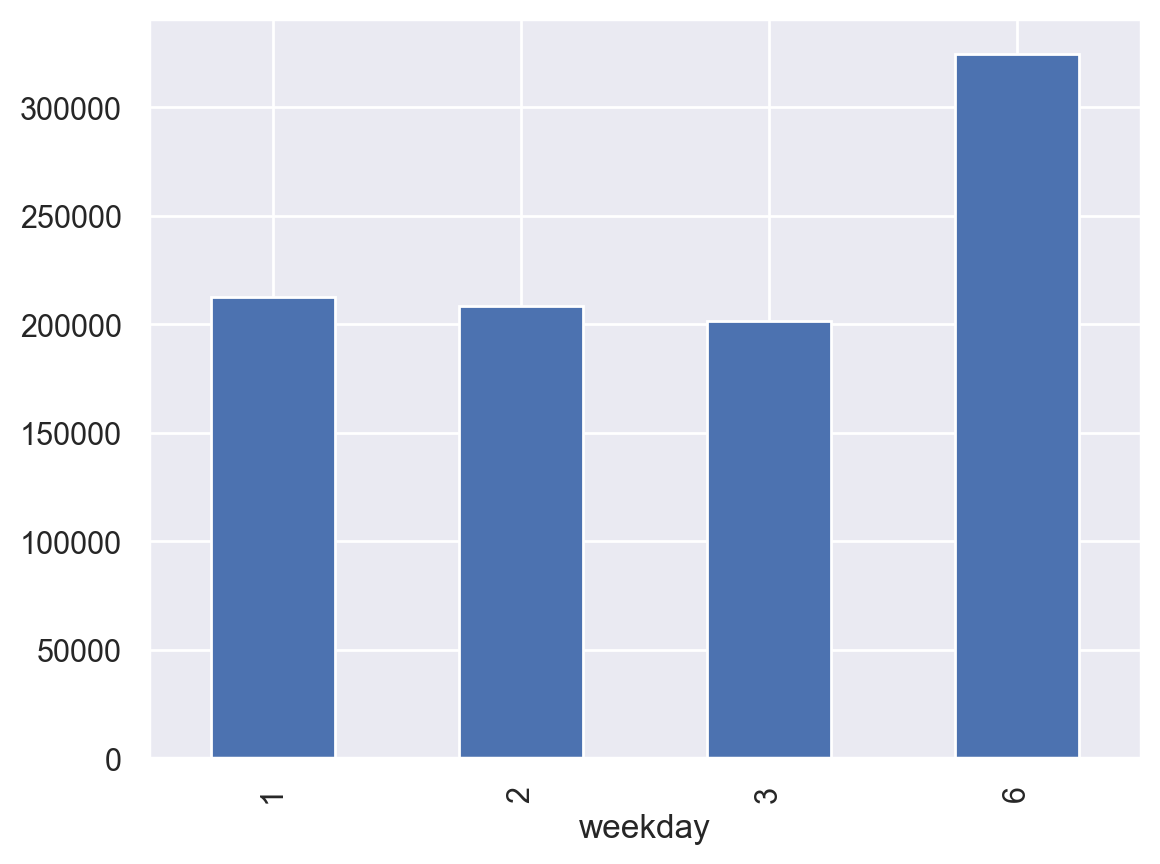

In [42]:
trends.groupby('weekday').mean()['time_min_elapsed'].plot.bar()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4080\616038380.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends.groupby('weekday').mean()['time_min_elapsed'].plot(kind='bar', figsize=(12,5))


Text(0.5, 1.0, 'Average training time by day of the week')

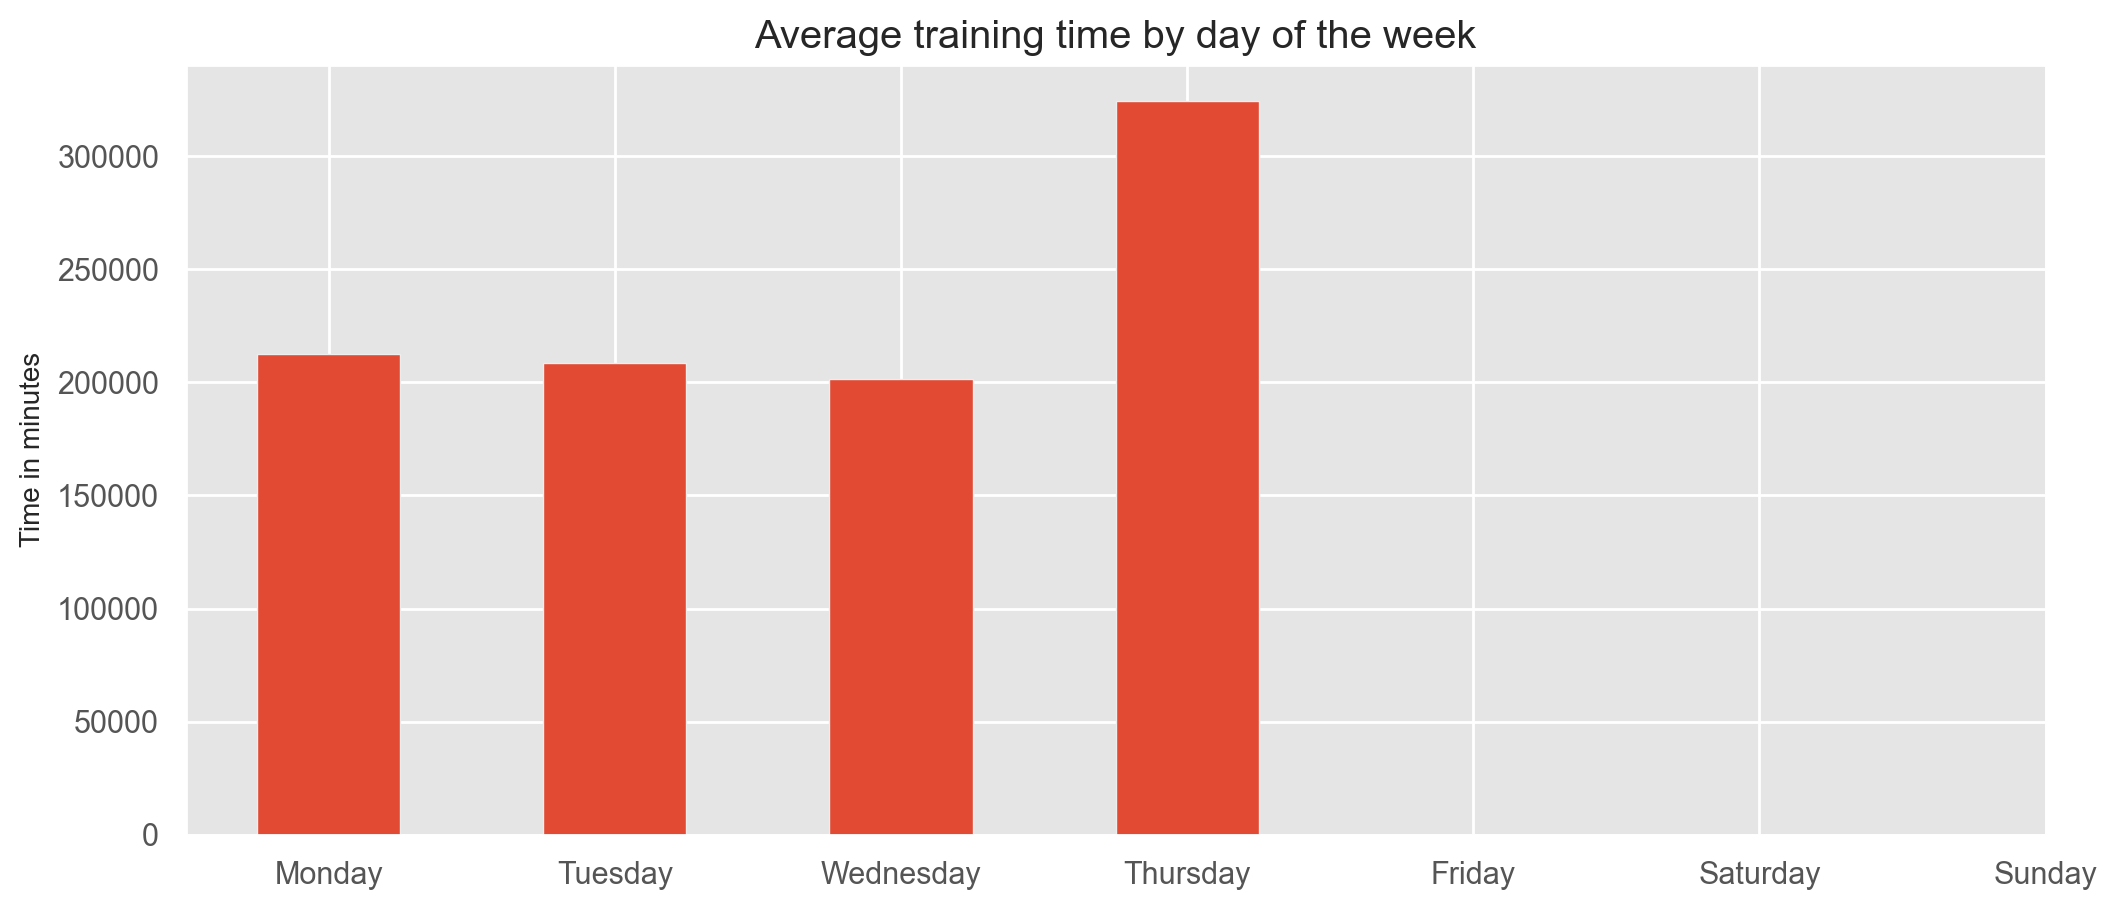

In [43]:
import calendar
list(calendar.day_name)

plt.style.use('ggplot')

trends.groupby('weekday').mean()['time_min_elapsed'].plot(kind='bar', figsize=(12,5))
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal')
plt.xlabel('')
plt.ylabel('Time in minutes')
plt.title('Average training time by day of the week')

In [44]:
trends['year'] = trends.index.map(lambda x: x.year)

In [45]:
trends['year'].value_counts()

2023    53
Name: year, dtype: int64

In [46]:
trends.groupby('year').mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4080\970283038.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends.groupby('year').mean()


,run_id,student_id,average_speed,average_heartrate,max_heartrate,distance,total_elevation_gain,elev_high,partition_hour,time_min_elapsed,time_min_moving,weekday
year,,,,,,,,,,,,
2023,39.830189,2.079179e+07,4.224717,5.630491,4.982547,2.393774,473.535849,619.750943,15.037736,216979.245283,233090.943396,2.226415


C:\Users\Admin\AppData\Local\Temp\ipykernel_4080\439522498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends.groupby('year').mean()['time_min_elapsed'].plot(kind='bar')


<Axes: xlabel='year'>

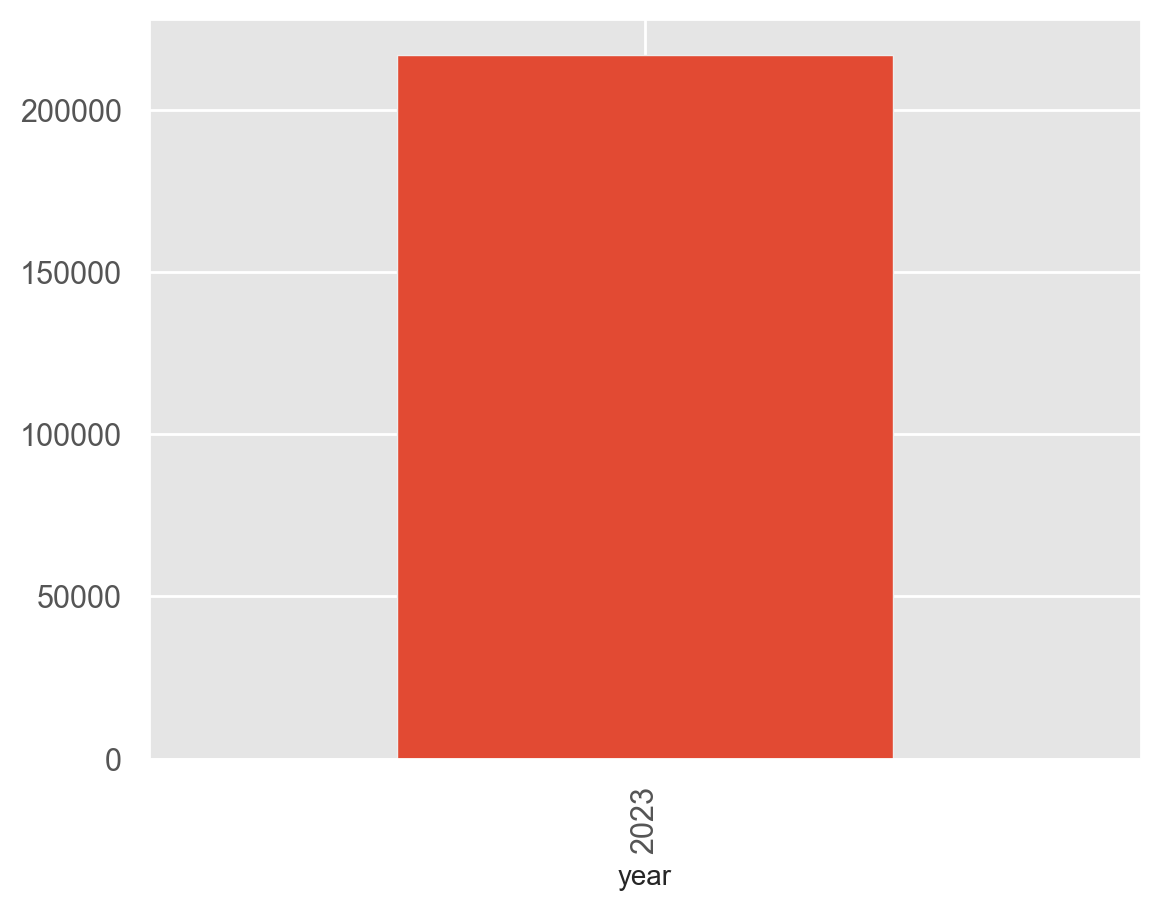

In [47]:
trends.groupby('year').mean()['time_min_elapsed'].plot(kind='bar')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


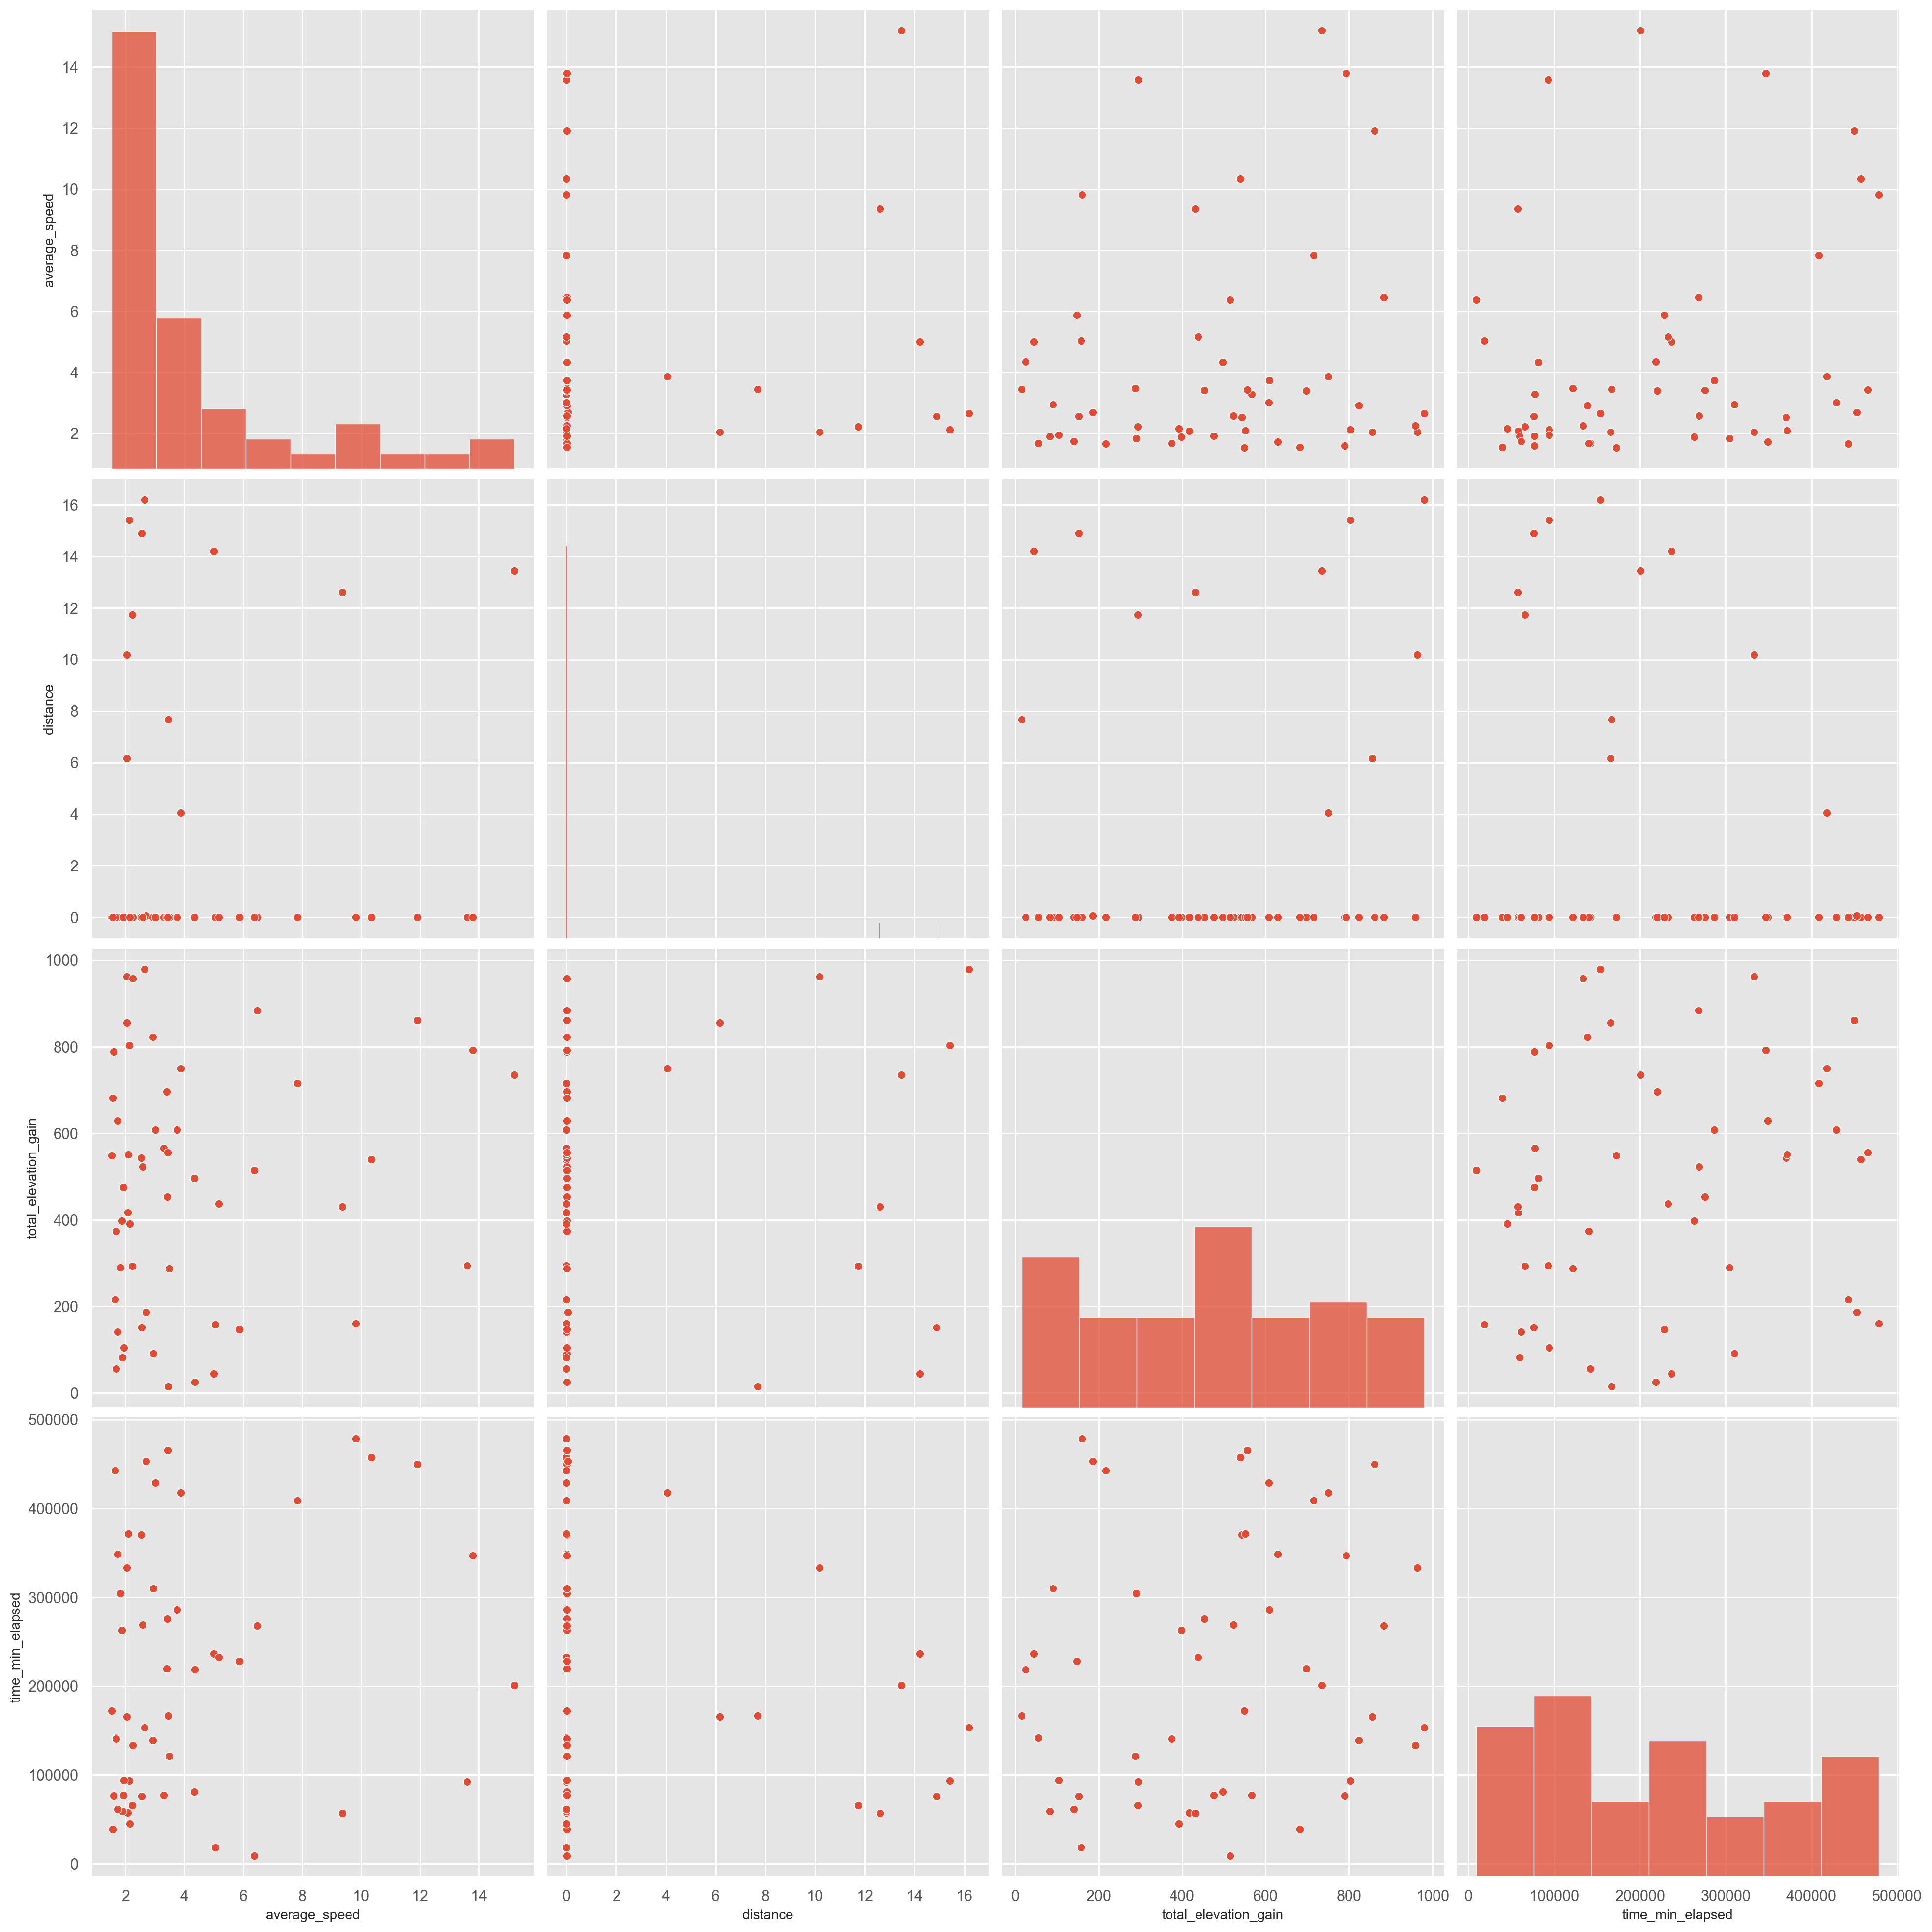

In [48]:
cols = ['average_speed','distance','total_elevation_gain','time_min_elapsed']
sns.pairplot(x_vars=cols, y_vars=cols, data=data, size=5)

In [63]:
data.head()


,run_id,average_speed,average_heartrate,max_heartrate,distance,total_elevation_gain,elev_high,partition_hour,time_min_elapsed,time_min_moving
start_date_local,,,,,,,,,,
2023-11-16 16:42:00,43.0,2.55,1.982,4.737,14.89,151.8,363.1,16,75780.0,181380.0
2023-11-16 16:42:00,44.0,5.00,7.239,6.934,14.20,45.2,580.6,16,236640.0,172800.0
2023-11-16 16:42:00,69.0,3.45,10.296,3.762,7.68,15.1,728.0,16,166800.0,285420.0
2023-11-16 16:43:00,80.0,3.87,6.990,3.417,4.05,749.9,1168.9,16,418020.0,24120.0
2023-11-21 21:29:00,17.0,2.07,3.605,2.792,0.00,417.3,1166.0,21,57540.0,95820.0


In [53]:

data = data.drop(['student_id', 'name','gender'], axis=1)

In [56]:
data = data.drop(['org_name', 'org_name_child','year_study'], axis=1)


In [58]:

data = data.drop(['timestamp'], axis=1)

In [60]:
data = data.drop(['partition_date'], axis=1)

In [64]:
data = data.drop(['run_id','average_heartrate','max_heartrate','partition_hour'], axis=1)

In [65]:
import sklearn
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data)

In [66]:
data_scaled = pd.DataFrame(X, columns=['average_speed', 'distance', 'total_elevation_gain', 'elev_high', 'time_min_elapsed', 'time_min_moving'])

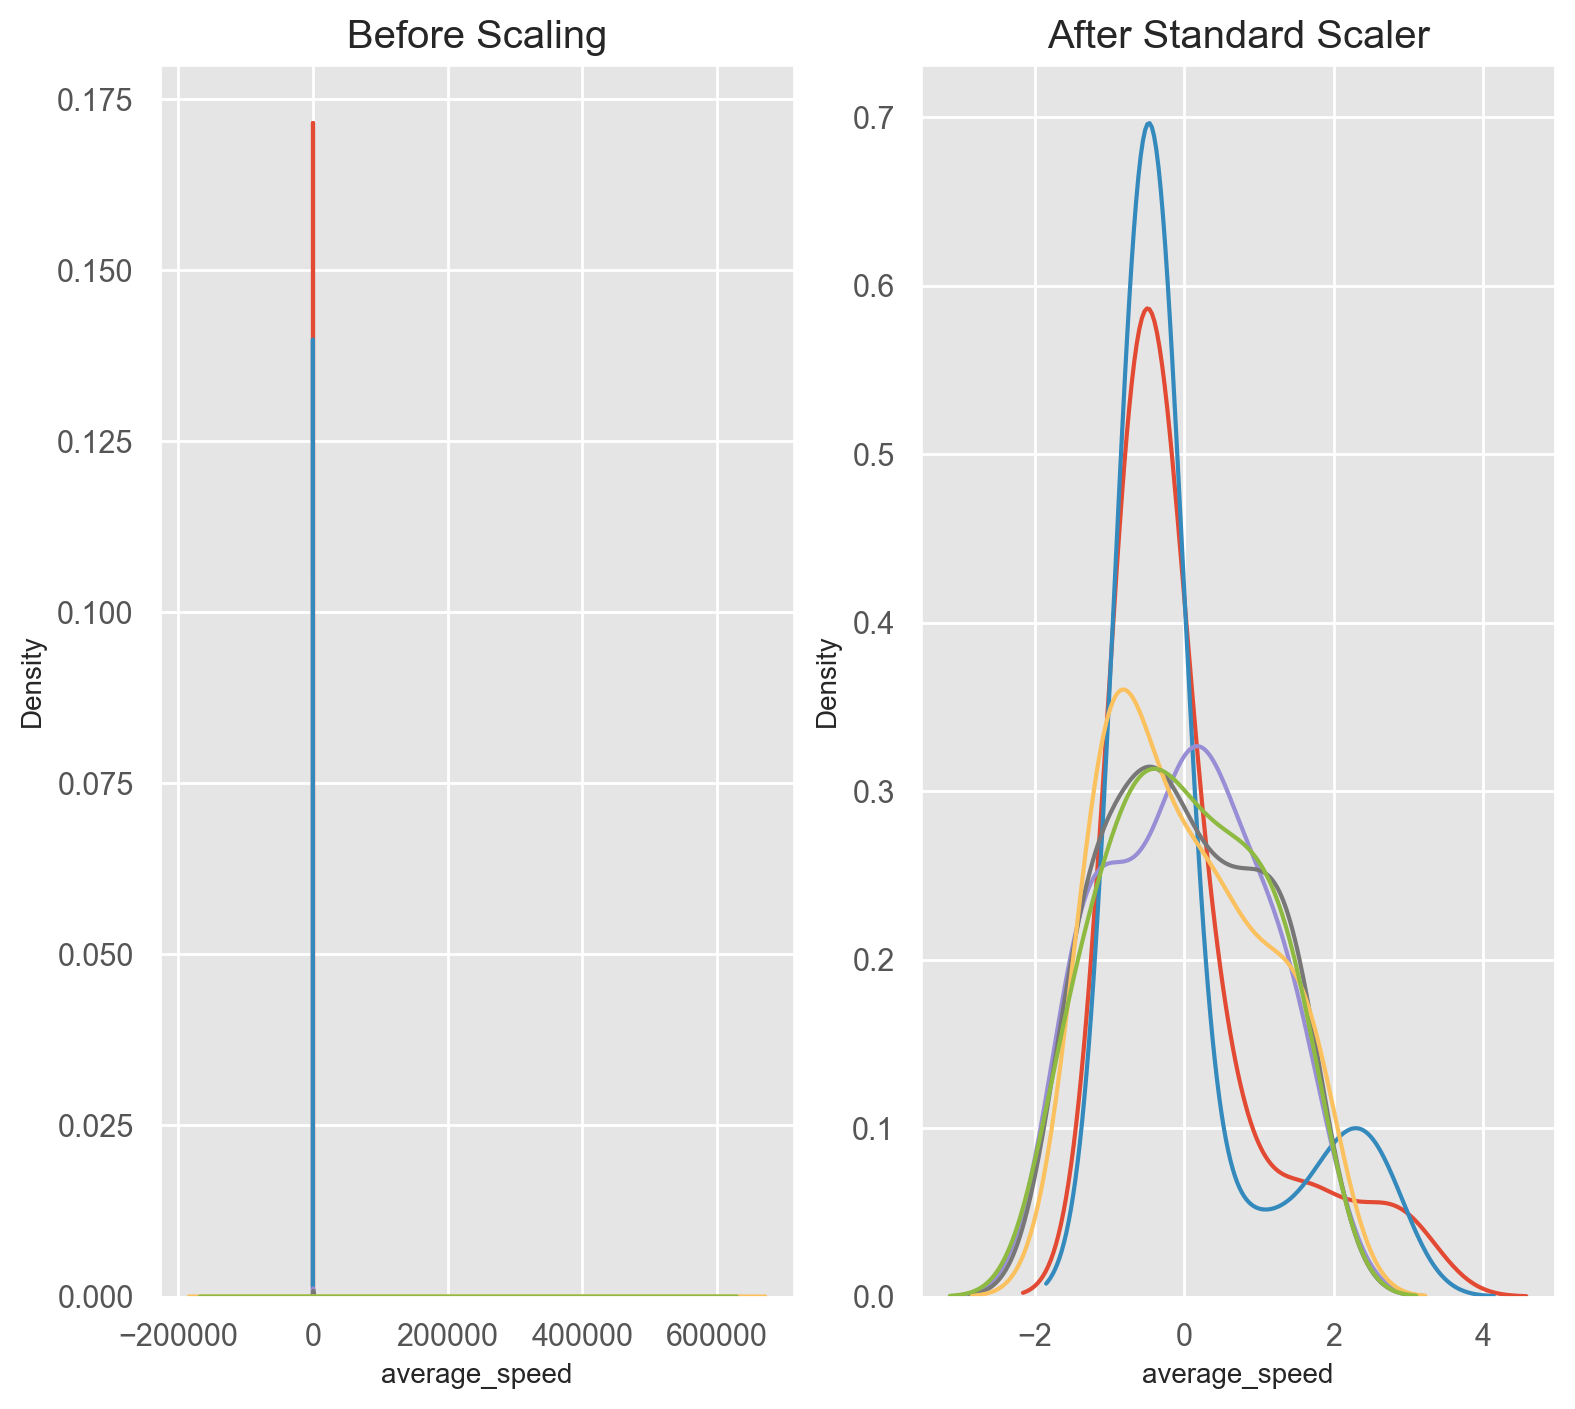

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,8))

ax1.set_title('Before Scaling')
sns.kdeplot(data['average_speed'], ax=ax1)
sns.kdeplot(data['distance'], ax=ax1)
sns.kdeplot(data['total_elevation_gain'], ax=ax1)
sns.kdeplot(data['elev_high'], ax=ax1)
sns.kdeplot(data['time_min_elapsed'], ax=ax1)
sns.kdeplot(data['time_min_moving'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(data_scaled['average_speed'], ax=ax2)
sns.kdeplot(data_scaled['distance'], ax=ax2)
sns.kdeplot(data_scaled['total_elevation_gain'], ax=ax2)
sns.kdeplot(data_scaled['elev_high'], ax=ax2)
sns.kdeplot(data_scaled['time_min_elapsed'], ax=ax2)
sns.kdeplot(data_scaled['time_min_moving'], ax=ax2)

plt.show()

In [68]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X)
data['Cluster'] = model.labels_

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [69]:
data['Cluster'].value_counts()

4    19
2    14
1     8
3     7
0     5
Name: Cluster, dtype: int64

In [70]:
data.groupby('Cluster').mean()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
Cluster,,,,,,
0,11.496000,0.004000,640.520000,681.960000,351132.000000,339636.000000
1,3.938750,0.011250,314.600000,385.587500,397297.500000,174300.000000
2,3.075000,1.462857,677.285714,728.507143,192677.142857,93111.428571
3,5.584286,14.067143,491.328571,594.185714,126205.714286,243574.285714
4,2.777895,0.411053,339.826316,631.257895,157102.105263,329087.368421


In [71]:
data.groupby('Cluster').std()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
Cluster,,,,,,
0,2.478272,0.005477,227.690353,335.134261,151064.572683,67911.884674
1,2.689490,0.020310,216.448529,380.545321,88226.771083,98151.794977
2,1.415283,3.139638,201.035924,414.248395,121942.884955,61882.152374
3,4.964191,1.581146,353.964390,413.211755,71319.146297,110974.558474
4,1.383123,1.760262,233.236301,377.348679,105603.282545,81887.731875


In [72]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

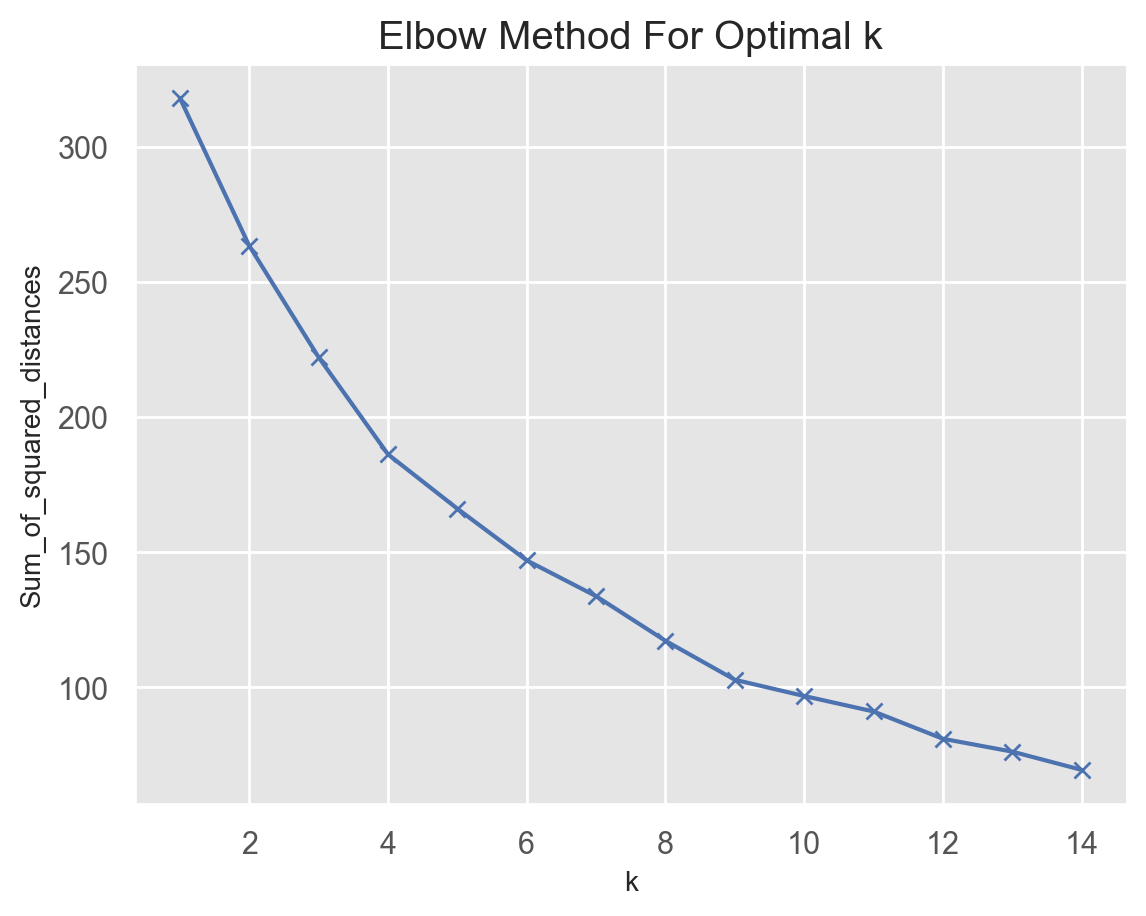

In [73]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [74]:
data.groupby('Cluster').mean()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
Cluster,,,,,,
0,11.496000,0.004000,640.520000,681.960000,351132.000000,339636.000000
1,3.938750,0.011250,314.600000,385.587500,397297.500000,174300.000000
2,3.075000,1.462857,677.285714,728.507143,192677.142857,93111.428571
3,5.584286,14.067143,491.328571,594.185714,126205.714286,243574.285714
4,2.777895,0.411053,339.826316,631.257895,157102.105263,329087.368421


In [75]:
data['Cluster'].value_counts()

4    19
2    14
1     8
3     7
0     5
Name: Cluster, dtype: int64

In [76]:
data[data['Cluster'] == 2]

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,Cluster
start_date_local,,,,,,,
2023-11-16 16:43:00,3.87,4.05,749.9,1168.9,418020.0,24120.0,2
2023-11-21 21:29:00,2.07,0.00,417.3,1166.0,57540.0,95820.0,2
2023-11-16 16:41:00,2.04,10.18,962.7,844.3,333180.0,218280.0,2
2023-11-16 16:41:00,2.05,6.17,855.3,451.2,165480.0,137100.0,2
2023-11-21 20:35:00,2.52,0.01,543.1,768.5,370320.0,100740.0,2
2023-11-29 10:36:00,3.29,0.00,566.6,210.8,76980.0,123420.0,2
2023-11-29 10:33:00,5.17,0.00,438.0,1171.1,232680.0,7080.0,2
2023-11-21 20:35:00,2.92,0.01,822.9,274.9,138720.0,174600.0,2
2023-11-21 20:35:00,4.33,0.01,496.9,175.5,81120.0,32820.0,2


In [77]:
data[data['Cluster'] == 1]

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,Cluster
start_date_local,,,,,,,
2023-11-29 10:40:00,2.95,0.01,91.0,277.0,310020.0,83940.0,1
2023-11-16 15:45:00,2.69,0.06,186.7,883.6,453120.0,171360.0,1
2023-11-29 10:38:00,1.65,0.00,216.6,1022.3,442980.0,44700.0,1
2023-11-29 10:41:00,3.01,0.00,607.9,186.8,428700.0,156660.0,1
2023-11-29 10:35:00,2.09,0.00,551.2,500.1,371160.0,155040.0,1
2023-11-19 21:23:00,9.82,0.00,160.7,66.1,478800.0,254460.0,1
2023-11-29 10:38:00,3.43,0.01,555.8,82.0,465660.0,362160.0,1
2023-11-29 10:38:00,5.87,0.01,146.9,66.8,227940.0,166080.0,1


In [78]:
data[data['Cluster'] == 4]

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,Cluster
start_date_local,,,,,,,
2023-11-16 16:42:00,3.45,7.68,15.1,728.0,166800.0,285420.0,4
2023-11-21 21:29:00,1.88,0.01,398.4,525.8,262740.0,454560.0,4
2023-11-21 21:29:00,1.83,0.01,289.7,957.8,304500.0,270540.0,4
2023-11-21 21:30:00,1.52,0.01,549.0,458.9,172140.0,408060.0,4
2023-11-29 10:39:00,4.34,0.01,25.5,1087.9,218520.0,342960.0,4
2023-11-29 10:40:00,3.48,0.01,287.7,427.5,121140.0,328680.0,4
2023-11-29 10:35:00,3.41,0.01,453.1,830.2,275700.0,366960.0,4
2023-11-29 10:35:00,5.04,0.00,158.0,474.1,18180.0,241680.0,4
2023-11-29 10:40:00,1.89,0.00,82.2,348.1,59160.0,258600.0,4
